References:
- https://www.nltk.org/book/
- https://nlp.stanford.edu/IR-book/html/htmledition/stemming-and-lemmatization-1.html
# Stemming and Lemmatization

Motivation: Documents use different forms of a word such as 
- organize, 
- organizes and 
- organizing. 

There are also a families of derivationally related words with similar meanings such as
- democracy
- democratic
- democratization

## Goal of Stemming and Lemmatization
### Similarities
- Reduce inflectional forms and
- Reduce derivationally related forms to a a base form

**Stemming** usually refers to 
- a crude heuristic process that 
- chops off the ends of words in the hope of achieving this goal correctly most of the time, and often includes the **removal of derivational affixes**

**Lemmatization** usually refers to doing things properly with the use of 
- a vocabulary and morphological analysis of words, normally 
- **aiming to remove inflectional endings only, and to return the base or dictionary form of a word**, which is known as the lemma

### Differences
The two methods may differ in that:

- Stemming most commonly collapses derivationally related words, whereas
- Lemmatization commonly collapses the different inflectional points of a lemma

## Common Algorithms
Stemming - Porter's Algorithm

Lemmatization - Word Net

In [8]:
# example 1

# We start with the word dance and try to find variations of the word 'root' or 'origin'.
# Try Dances, Dancing, Dancer etc. See how many combinations of words you can find that share the root.


import nltk
from nltk.stem import PorterStemmer
nltk.download('wordnet')


list_of_words = ["operate", "operating", "operates", "operation", "operative", "operatives","operational"]

porter = PorterStemmer()

from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()

# Extension activity 1: Try to take this example further by using a ["list", "of", "words"]  

for word in list_of_words:
    
    print("Stemmed word: " + porter.stem(word) + ", Lemmatized word: " + wordnet_lemmatizer.lemmatize(word))

# Extension activity 2: Have a go at iterating through a list of words 
# with a for loop to make your code more efficient.



Stemmed word: oper, Lemmatized word: operate
Stemmed word: oper, Lemmatized word: operating
Stemmed word: oper, Lemmatized word: operates
Stemmed word: oper, Lemmatized word: operation
Stemmed word: oper, Lemmatized word: operative
Stemmed word: oper, Lemmatized word: operative
Stemmed word: oper, Lemmatized word: operational


[nltk_data] Downloading package wordnet to /Users/pcowe/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


## Additional Resources
NLTK also has categorisation and tagging options. These are beyond the scope of this course <b>but</b>

If you do wish to explore these, the documentation can be found <a href="https://www.nltk.org/book/ch05.html">here</a>.


Section **1 Using a Tagger and Section 2 Tagged Corpora** might be particularly **useful resources for your coursework !!!!!!!!!!!!!!**



## NLP Pipeline: Categorizing and Tagging Words
*Motivation*: Distinguishing between word classes: nouns, verbs, adjectives, adverbs
- Useful in many NLP tasks

*Tagging*: Classifying words into their Parts-of-speech and labeling them accordingly (POS Tagging). 

Parts of speech are also known as 
- **word classes**, or
- **lexical categories**

The collection of tags used for a particular task is known as a tagset.

**Emphasis on this chapter is to**
1. Explot tags
2. Tagging text automatically


In [15]:
nltk.download('punkt')
from nltk.tokenize import word_tokenize
text = word_tokenize("And now for something completely different")
text

[nltk_data] Downloading package punkt to /Users/pcowe/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


['And', 'now', 'for', 'something', 'completely', 'different']

A part of speech tagger, processes a sequence of words, and attaches a part of speech tag to each word

In [17]:
# nltk.download('averaged_perceptron_tagger')
nltk.pos_tag(text)

[('And', 'CC'),
 ('now', 'RB'),
 ('for', 'IN'),
 ('something', 'NN'),
 ('completely', 'RB'),
 ('different', 'JJ')]

In [18]:
text = word_tokenize("They refuse to permit us to obtain the refuse permit")
nltk.pos_tag(text)

[('They', 'PRP'),
 ('refuse', 'VBP'),
 ('to', 'TO'),
 ('permit', 'VB'),
 ('us', 'PRP'),
 ('to', 'TO'),
 ('obtain', 'VB'),
 ('the', 'DT'),
 ('refuse', 'NN'),
 ('permit', 'NN')]

# Description of results
CC - Coordinating Conjunction

RB - Adverbs

IN - Preposition

NN - Noun

JJ - Adjective

VBP - Present tense verb

Notice that *refus* and *permit* both appear as a present tense verb (VBP) and a noun (NN). 

**Use case for POS Tagging**
- Text-to-speech systems: Identifying homonyms (same pronounciation/spelling, different meaning)

... TTS dont claim to identify homophones (same pronounciation, different meaning/spelling

In [22]:
# nltk.download('brown')
text = nltk.Text(word.lower() for word in nltk.corpus.brown.words())
text

<Text: the fulton county grand jury said friday an...>

### *The text.similar() method takes a word w, finds all contexts w1w w2, then finds all words w' that appear in the same context, i.e. w1w'w2.*

In [25]:
# print(text.similar('woman'))
# print(text.similar('bought'))
# print(text.similar('over'))
print(text.similar('the'))

a his this their its her an that our any all one these my in your no
some other and
None


**Observe that**: 
- searching for woman finds nouns; 
- searching for bought mostly finds verbs; 
- searching for over generally finds prepositions; 
- searching for the finds several determiners. 

A tagger can correctly identify the tags on these words in the context of a sentence, e.g. The woman bought over $150,000 worth of clothes.

In [28]:
text = "The woman bought over $150,000 worth of clothes"
list_of_words = word_tokenize(text)
nltk.pos_tag(list_of_words)

[('The', 'DT'),
 ('woman', 'NN'),
 ('bought', 'VBD'),
 ('over', 'IN'),
 ('$', '$'),
 ('150,000', 'CD'),
 ('worth', 'NN'),
 ('of', 'IN'),
 ('clothes', 'NNS')]

A tagger can also model our knowledge of unknown words, e.g. we can guess that scrobbling is probably a verb, with the root scrobble, and likely to occur in contexts like he was scrobbling.

# Tagged Corpora
### Representing Tagged Tokens (String -> Tuple)
By convention in NLTK, a tagged tokes is represented using a tuple consisting of the token and a tag. We can create one of these tuples from the standard string representation of a tagged token using the *str2tuple()*

In [30]:
tagged_token = nltk.tag.str2tuple('fly/NN') # a word
tagged_token

('fly', 'NN')

We can construct a list of tagged tokens directly from a string. The first step is to tokenize the string to access the individual word/tag strings, and then to convert each of these into a tuple (using str2tuple() ). 

In [34]:
sent = '''The/AT grand/JJ jury/NN commented/VBD on/IN a/AT number/NN of/IN
other/AP topics/NNS ,/, AMONG/IN them/PPO the/AT Atlanta/NP and/CC
Fulton/NP-tl County/NN-tl purchasing/VBG departments/NNS which/WDT it/PPS
said/VBD ``/`` ARE/BER well/QL operated/VBN and/CC follow/VB generally/RB
accepted/VBN practices/NNS which/WDT inure/VB to/IN the/AT best/JJT
interest/NN of/IN both/ABX governments/NNS ''/'' ./.
'''
tagged_tokens_list = [nltk.tag.str2tuple(word_tag) for word_tag in sent.split(" ")]
tagged_tokens_list

[('The', 'AT'),
 ('grand', 'JJ'),
 ('jury', 'NN'),
 ('commented', 'VBD'),
 ('on', 'IN'),
 ('a', 'AT'),
 ('number', 'NN'),
 ('of/IN\nother', 'AP'),
 ('topics', 'NNS'),
 (',', ','),
 ('AMONG', 'IN'),
 ('them', 'PPO'),
 ('the', 'AT'),
 ('Atlanta', 'NP'),
 ('and/CC\nFulton', 'NP-TL'),
 ('County', 'NN-TL'),
 ('purchasing', 'VBG'),
 ('departments', 'NNS'),
 ('which', 'WDT'),
 ('it/PPS\nsaid', 'VBD'),
 ('``', '``'),
 ('ARE', 'BER'),
 ('well', 'QL'),
 ('operated', 'VBN'),
 ('and', 'CC'),
 ('follow', 'VB'),
 ('generally/RB\naccepted', 'VBN'),
 ('practices', 'NNS'),
 ('which', 'WDT'),
 ('inure', 'VB'),
 ('to', 'IN'),
 ('the', 'AT'),
 ('best/JJT\ninterest', 'NN'),
 ('of', 'IN'),
 ('both', 'ABX'),
 ('governments', 'NNS'),
 ("''", "''"),
 ('.', '.\n')]

<h1> Activity 2 </h1>

When working with text we often try to generate a high level overview of a corpus to determine things like its suitability for analysis and general structure/themes. There are a few ways we can do this. Let's begin with our high level analysis of the features of the text - starting with a familiar concept, term frequency!

Without stop words: ['like', 'dance', '.', 'fun', 'dance', '.']
With stop words: ['i', 'like', 'to', 'dance', '.', 'it', 'is', 'fun', 'to', 'dance', '.']
<FreqDist with 8 samples and 11 outcomes>


[nltk_data] Downloading package punkt to /Users/pcowe/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /Users/pcowe/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


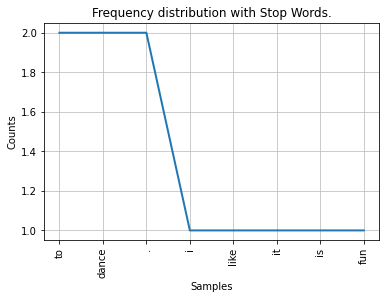

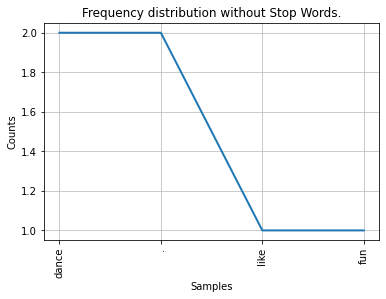

<AxesSubplot:title={'center':'Frequency distribution without Stop Words.'}, xlabel='Samples', ylabel='Counts'>

In [37]:
# example two, plotting popular words

import nltk
nltk.download('punkt')
nltk.download('stopwords')

# You don't have to include stopwords. You may decide to keep them in for your analysis.

from nltk.corpus import stopwords


# Let's save some time and use a library that is fit for purpose. No point reinventing the wheel!
from nltk.probability import FreqDist

sentence="I like to dance. It is fun to dance."
# You might also wish to 'standardise' the text to lowercase using sentence.lower(). 
# Uncomment the line below (remove the #) if you do wish to standardise.

sentence = sentence.lower()

tokens = nltk.tokenize.word_tokenize(sentence)

# This is one way to remove stopwords
filtered = [word for word in tokens if not word in stopwords.words()]
print("Without stop words:", filtered)

f_dist = FreqDist(tokens)

print("With stop words:", tokens)
print(f_dist)

# We can plot the data we have in a relatively simple manner, either with or without stopwords. 
import matplotlib.pyplot as plt
fd = nltk.FreqDist(tokens)

# We will feed our plot all '8' words as a parameter for our plot. We also want to set cumulative as 'false'
fd.plot(8,cumulative=False, title="Frequency distribution with Stop Words.")

fd_filtered = nltk.FreqDist(filtered)
fd_filtered.plot(8,cumulative=False, title="Frequency distribution without Stop Words.")

<h1> Activity 3 </h1>
<h3>Sentiment analysis is another way to contextualise words and their associated meaning. </h3>

We can think of sentiment as either positive or negative, but this is a spectrum. 'Good' is not the same as 'Great.' It's good, but it's not great! I like chocolate but love coffee. If you gave me the choice of either chocolate or coffee, I'd always choose coffee!

Some words perhaps do not have any sentiment at all, e.g. table, cabbage.

We will use a popular library for social media data analysis to quickly calculate some metrics and see how we can turn a word into a quantifiable metric based on some predefined rules.

In [4]:
# example 4 detecting sentiment - the easy way

from nltk.sentiment.vader import SentimentIntensityAnalyzer

# You will also want to load the Lexicon that quantifies polar sentiment (positive/negative)
# Again, with Python, other people have often done the heavy lifting for us!
nltk.download('vader_lexicon')

analyzer=SentimentIntensityAnalyzer()

# Values live on a spectrum. Love is more extremely positive than like for example.
sentence = "I love sandwiches. I hate cheese."

# Try tweaking this sentence with your own words and phrases. 
# Does the order of words matter? Can you find any surprising categorisations of +/- sentiment?

analyzer.polarity_scores(sentence)

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/sean/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


{'neg': 0.374, 'neu': 0.202, 'pos': 0.424, 'compound': 0.128}

<h1> Activity 4 </h1>
<h3> High level visualisations for narrative </h3>
We cover visualisations later, but let's have a look at how we might visualise some given text in a simple way.

This is really helpful in the context of exploratory data analysis to give us a high level overview of words.

I love sandwiches. I hate cheese.


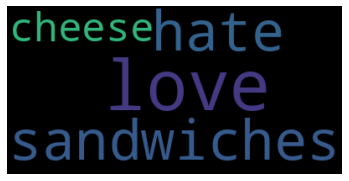

In [11]:
# example 4 final, plotting a word cloud

from wordcloud import WordCloud

print(sentence)
sentence = 'I love sandwiches. I hate cheese.'

# Create and generate a word cloud image:
wordcloud = WordCloud().generate(sentence)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')

# bilinear interpolation is a way to spread the words out without them bumping into one another
plt.axis("off")
plt.show()

# Do you notice some words missing? Did you remove stopwords? Have a go at loading a file in.
# Can you produce a wordcloud of some text that you are interested in analysing?

We've seen some very simple examples of what we can do here. Use this boiletplate code to pick a 'theme' of your own. Find a dataset that contains some words and see if you can work through the data processing pipeline in the same way.

Finally, see if you can share a mini analysis of your own using some or even all of the tools you have learned about.